# Исследование информации о об играх и продажах в Европе (EU), Северной Америке (NA) и России (RU)
_____
### В данном исследовании представлена таблица с данными ассоциации ESRB, которая оценивает игровой контент.
______

#### Данное исследование раздеолено на несколько частей.

<a href='#общая информация'><h3>1. Изучение общей информации</a>
<a href='#предподготовка'><h3>2. Предподготовка данных и обработка пропусков</a>
<a href='#исследовательский'><h3>3. Исследовательский анализ данных</a>
<a href='#портрет'><h3>4. Портрет пользователя каждого региона</a>
<a href='#гипотезы'><h3>5. Проверка гипотезы</a>
<a href='#вывод'><h3>6. Рекомендации для рекламной кампании</a>



<a id='общая информация'></a>
## Шаг 1. Изучение общей информации

In [43]:
import pandas as pd

In [44]:
games = pd.read_csv('/datasets/games.csv')

In [45]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [46]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [47]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<a id='предподготовка'></a>
## Шаг 2. Предподготовка данных и обработка пропусков

Заменим названия столбцов (приведем к нижнему регистру)

In [48]:
games.columns = games.columns.str.lower()

Пропуски в столбцах с рейтингами от критиков и пользователей довольно много. Проверим, сколько получилось значений с "0" и насколько они влияют на значения в выборке. 
С нулем в рейтингах критиков больше половины записей, с нулем в рейтинге пользователей - 6700 значений из 16700.
Маловероятно, что эти значения пропущены случайно и заменить их на 0 - значит серьезно повлиять на выборку.
Также в графе с рейтингами существует значение "tbd". Согласно гейменрсому порталу https://fb.ru/ tbd - To Be Determined, то есть "Будет определено". 

Скорее всего в данном случае рейтинг не определялся, однако заменить данные на "0" мы не можем, поскольку это может повлиять на итоговые данные.

In [49]:
#print(games.query('user_score == "tbd"'))

In [50]:
display(games.query('user_score == "tbd"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


На настоящий момент заменять пропуски в столюцах с рейтингами нецелесообразно, поскольку данная замена будет оказывать сильное значение на общие данные. Заменим его на "-1", чтобы при необходимости отфильтровать эти значения и заменить тип столбца на числовой.

In [51]:
games['user_score'] = games['user_score'].replace(['tbd', '-1'], 'user_score')

Преобразуем данные в нужные типы. Год выпуска преобразуем в текстовый тип, чтобы избавиться от "0" после запятой. Рейтинг пользователей преобразуем в числовой тип.

In [52]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [53]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [54]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [55]:
print(games.query('user_score == "tbd"'))

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, total_sales]
Index: []


In [56]:
game_count = games.pivot_table(index=['name'], values=['na_sales','eu_sales','jp_sales','other_sales', 'total_sales'], aggfunc='sum')

In [57]:
game_count.sort_values('total_sales', ascending=False).head(5)

,eu_sales,jp_sales,na_sales,other_sales,total_sales
name,,,,,
Wii Sports,28.96,3.77,41.36,8.45,82.54
Grand Theft Auto V,23.42,1.42,23.84,7.90,56.58
Super Mario Bros.,4.88,6.96,32.48,0.99,45.31
Tetris,2.95,6.03,26.17,0.69,35.84
Mario Kart Wii,12.76,3.79,15.68,3.29,35.52


Выше приведена таблица с топ-5 самых успешных с коммерческой точки зрения играми за все время выборки в порядке убывания. Если честно, мне просто было любопытно какие игры самые коммерчески успешные.

Значимые пропуски выявлены в 3 графах - оценка критиков, пользователей и возрастной рейтинг. Что касается оценки критиков и пользователей, то здесь пропуски заполнять нецелесообразно, поскольку это может повлиять на итоговые результаты. Вот возрастной рейтинг попробуем заполнить в зависимости от жанра.

In [58]:
rate_nan = games[games['rating'].isnull()]

In [59]:
rate_nan

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [60]:
rate_genre = games.pivot_table(index=['genre', 'rating'], values=['name'], aggfunc='count')
rate_genre

name
genre        rating      
Action       AO         1
             E        416
             E10+     481
             EC         1
             M        608
             T        681
Adventure    E        162
             E10+      68
             EC         2
             M         99
             T        115
Fighting     E          8
             E10+      19
             M         49
             T        362
Misc         E        457
             E10+     167
             EC         5
             K-A        1
             M         13
             T        239
Platform     E        358
             E10+     144
             M          3
             T         64
Puzzle       E        289
             E10+      43
             T         10
Racing       E        585
             E10+      96
             M         18
             RP         1
             T        172
Role-Playing E         84
             E10+     111
             M        162
             T        420
Shooter      E         48
             E10+      58
             M        565
             T        348
Simulation   E        325
             E10+      48
             M          5
             T        190
Sports       E       1188
             E10+     107
             M         16
             T        198
Strategy     E         70
             E10+      78
             K-A        2
             M         25
             RP         2
             T        162

Таким образом можно увидеть, в каком жанре какой возрастной рейтинг преобладает. Теперь заменим пропущенные значения наиболее часто встречающимися рейтингами в зависимости от жанра.

In [61]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [62]:
games['rating'].fillna(-2, inplace=True)
 
def rate_genre(row):
    if row["rating"] == -2 and row["genre"] == "Action":
        return "T"
    elif row["rating"] == -2 and row["genre"] == "Adventure":
        return "T"
    elif row["rating"] == -2 and row["genre"] == "Fighting":
        return "T"
    elif row["rating"] == -2 and row["genre"] == "Misc":
        return "E"
    elif row["rating"] == -2 and row["genre"] == "Platform":
        return "E"
    elif row["rating"] == -2 and row["genre"] == "Racing":
        return "E"
    elif row["rating"] == -2 and row["genre"] == "Puzzle":
        return "E"
    elif row["rating"] == -2 and row["genre"] == "Role-Playing":
        return "E"
    elif row["rating"] == -2 and row["genre"] == "Shooter":
        return "E"
    elif row["rating"] == -2 and row["genre"] == "Simulation":
        return "E"
    elif row["rating"] == -2 and row["genre"] == "Sports":
        return "E"
    elif row["rating"] == -2 and row["genre"] == "Strategy":
        return "E"    
    else: 
        return row["rating"]
 
games["rating"] = games.apply(rate_genre, axis=1)

import warnings
warnings.filterwarnings('ignore')

In [63]:
games['rating'].value_counts()

E       8305
T       5410
M       1563
E10+    1420
EC         8
K-A        3
RP         3
-2         2
AO         1
Name: rating, dtype: int64

Игр с рейтингами "T" и "E" стало намного больше. Пропускоы в возрастном рейтинге теперь нет. Посмотрим, как это повлияло на результаты.

<a id='исследовательский'></a>
# Шаг 3. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [64]:
year_count = games.pivot_table(index=['year_of_release'], values=['name'], aggfunc='count')

In [65]:
print (year_count)

                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               60
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              653
2013              544
2014              581
2015              606
2016              502


До 1994 года количество выпущенных игр было меньше 60-ти, пик произошел с 2006 по 2011 годы - в данные периоды выпускалось больше 1000 игр в год. После этого произошел спад, скорее всего связанный с кризисом в 2012 году.

Посмотрим, как менялись продажи по платформам. 

In [66]:
platform_year_count = games.pivot_table(index=['year_of_release', 'platform'], values = ['na_sales','eu_sales','jp_sales','other_sales', 'total_sales'], aggfunc='sum')

In [67]:
platform_year_count.sort_values('total_sales', ascending=False).head(15)

,,eu_sales,jp_sales,na_sales,other_sales,total_sales
year_of_release,platform,,,,,
2004,PS2,56.01,19.17,96.78,39.85,211.81
2009,Wii,58.31,16.57,114.55,17.54,206.97
2002,PS2,65.27,21.85,96.54,21.72,205.38
2003,PS2,61.20,18.88,83.54,20.69,184.31
2008,Wii,46.52,12.69,97.12,14.99,171.32
2010,X360,46.31,2.11,107.38,14.23,170.03
1998,PS,48.74,28.48,83.22,9.05,169.49
2001,PS2,52.37,17.79,79.49,16.78,166.43
2005,PS2,40.86,15.05,85.60,19.15,160.66


Как можно видеть из таблицы выше, игры с самыми крупными продажами выходили на платформах PS2, Wii,	X360, PS, PS3. Посчитаем 5 самых прибыльных платформ за все время и построим распределение по годам.

In [68]:
platform_total_count = games.pivot_table(index=['platform', 'year_of_release'], values = ['na_sales','eu_sales','jp_sales','other_sales', 'total_sales'], aggfunc='sum')

In [69]:
platform_total_count.sort_values('total_sales', ascending=False).head(5)

eu_sales  jp_sales  na_sales  other_sales  \
platform year_of_release                                              
PS2      2004                56.01     19.17     96.78        39.85   
Wii      2009                58.31     16.57    114.55        17.54   
PS2      2002                65.27     21.85     96.54        21.72   
         2003                61.20     18.88     83.54        20.69   
Wii      2008                46.52     12.69     97.12        14.99   

                          total_sales  
platform year_of_release               
PS2      2004                  211.81  
Wii      2009                  206.97  
PS2      2002                  205.38  
         2003                  184.31  
Wii      2008                  171.32

In [70]:
import matplotlib.pyplot as plt

In [71]:
import seaborn as sns

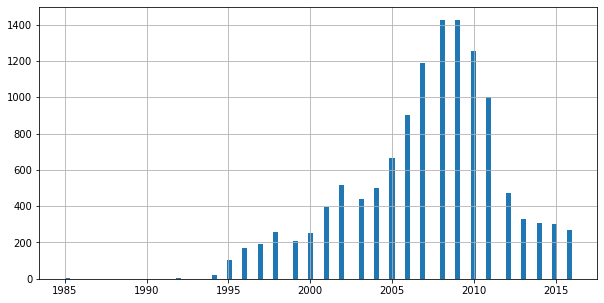

In [72]:
platform_total_count = games.groupby(['platform'])['total_sales'].sum().nlargest(10)
top_platforms = games.query('platform in @platform_total_count.index') 
top_platforms['year_of_release'].hist(bins=100, figsize=(10,5))

Самые популярные платформы начались примерно с 1994 года. В дальшейнем будем брать только этот период.

In [73]:
games_from94 = games.query('year_of_release >= 1994')

In [74]:
platform_grouped = games_from94.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

In [75]:
platform_grouped = platform_grouped.head(10).reset_index()

In [76]:
top_platforms_dict = platform_grouped['platform'].unique()

Это самые прибыльные платформы ,по ним и будем строить распределение.

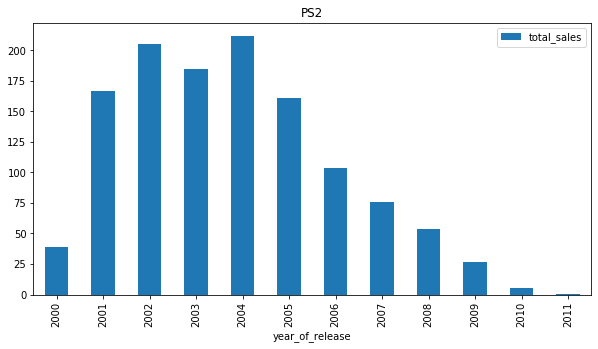

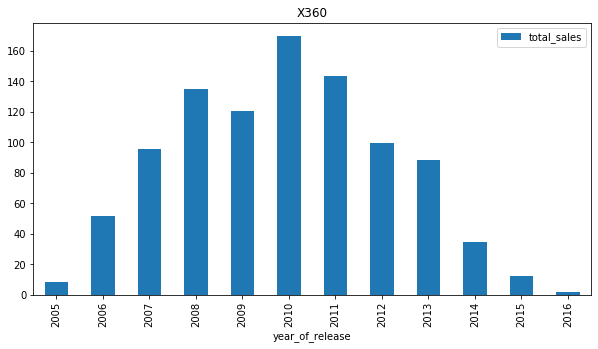

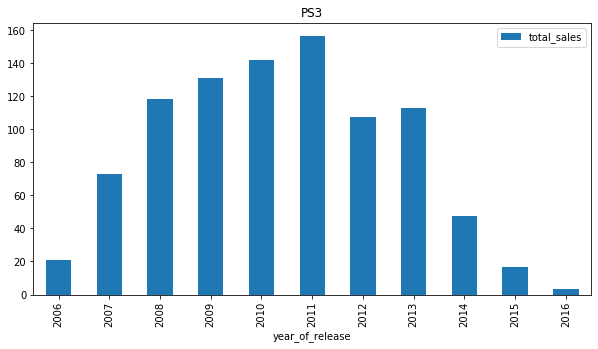

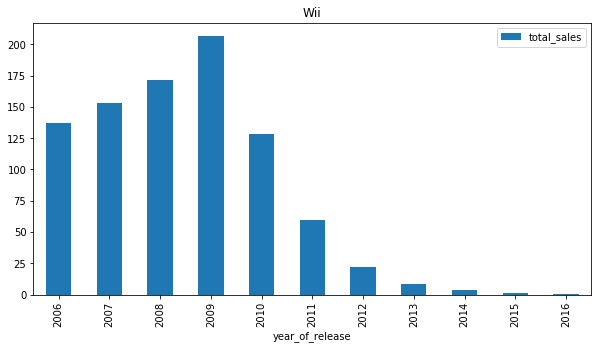

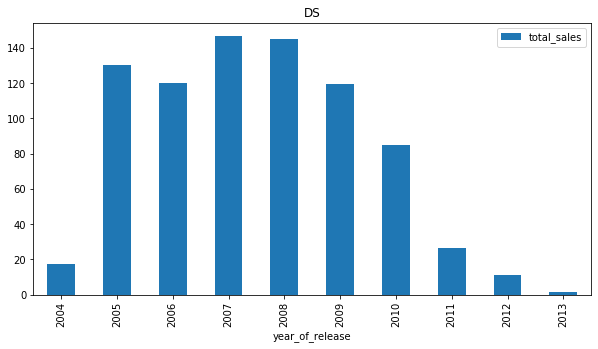

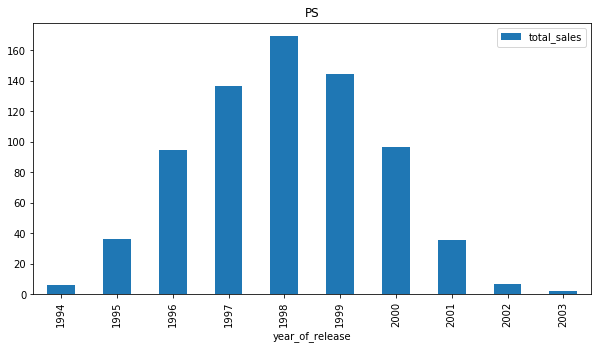

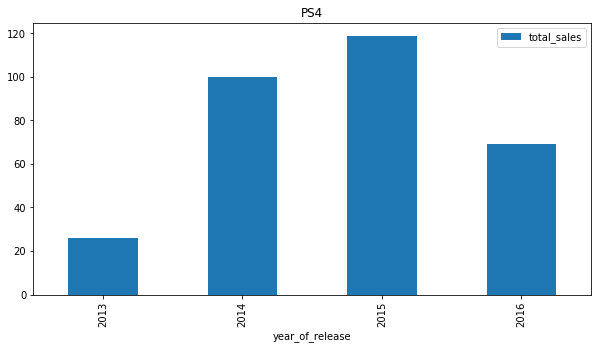

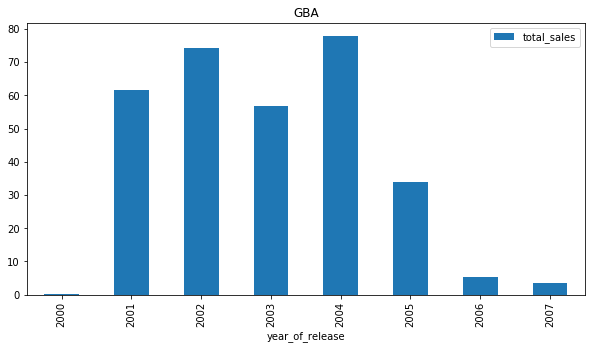

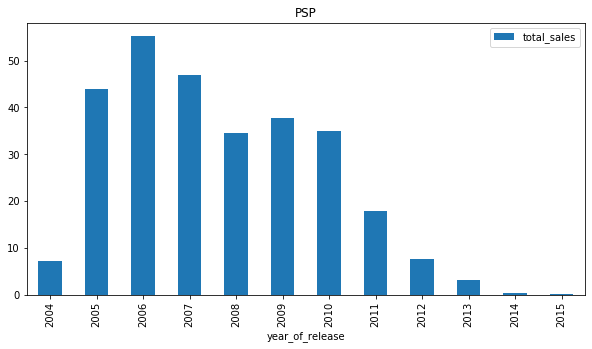

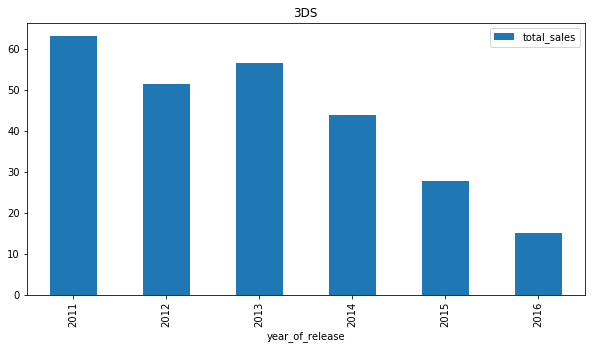

In [77]:
for platform in top_platforms_dict:
    games_from94[games_from94['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(10,5))
    plt.title(platform)

Выбрали платформы с наибольшими суммарными продажами и построили распределение по годам. В среднем можно сделать выбор, что платформа живет 3-4 года.

В качестве актуального периода будем считать период с 2014 по 2016 год - захватить бурный рост и период кризиса.

In [78]:
games_actual = games.query('year_of_release >= 2014')

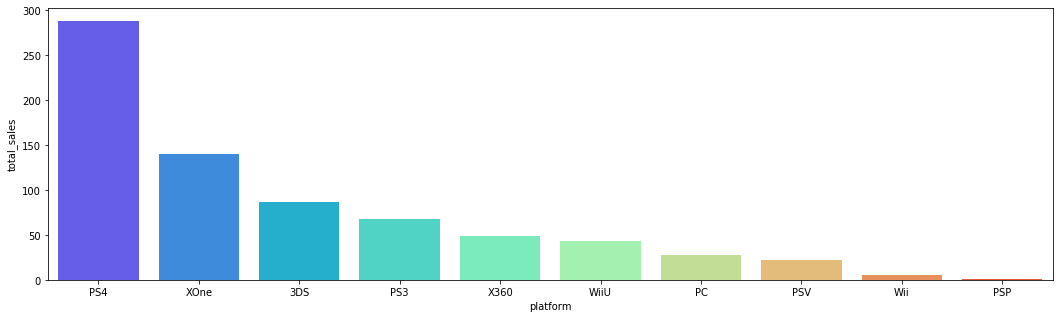

In [79]:
actual_2014_platf = games_actual.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(18, 5))
sns.barplot(data = actual_2014_platf, x='platform', y='total_sales', palette='rainbow')

Потенциально прибыльные, растущие платформы - PS4, XOne, 3DS.

In [80]:
top_platforms16 = actual_2014_platf['platform'].unique()

In [81]:
#top_platforms16

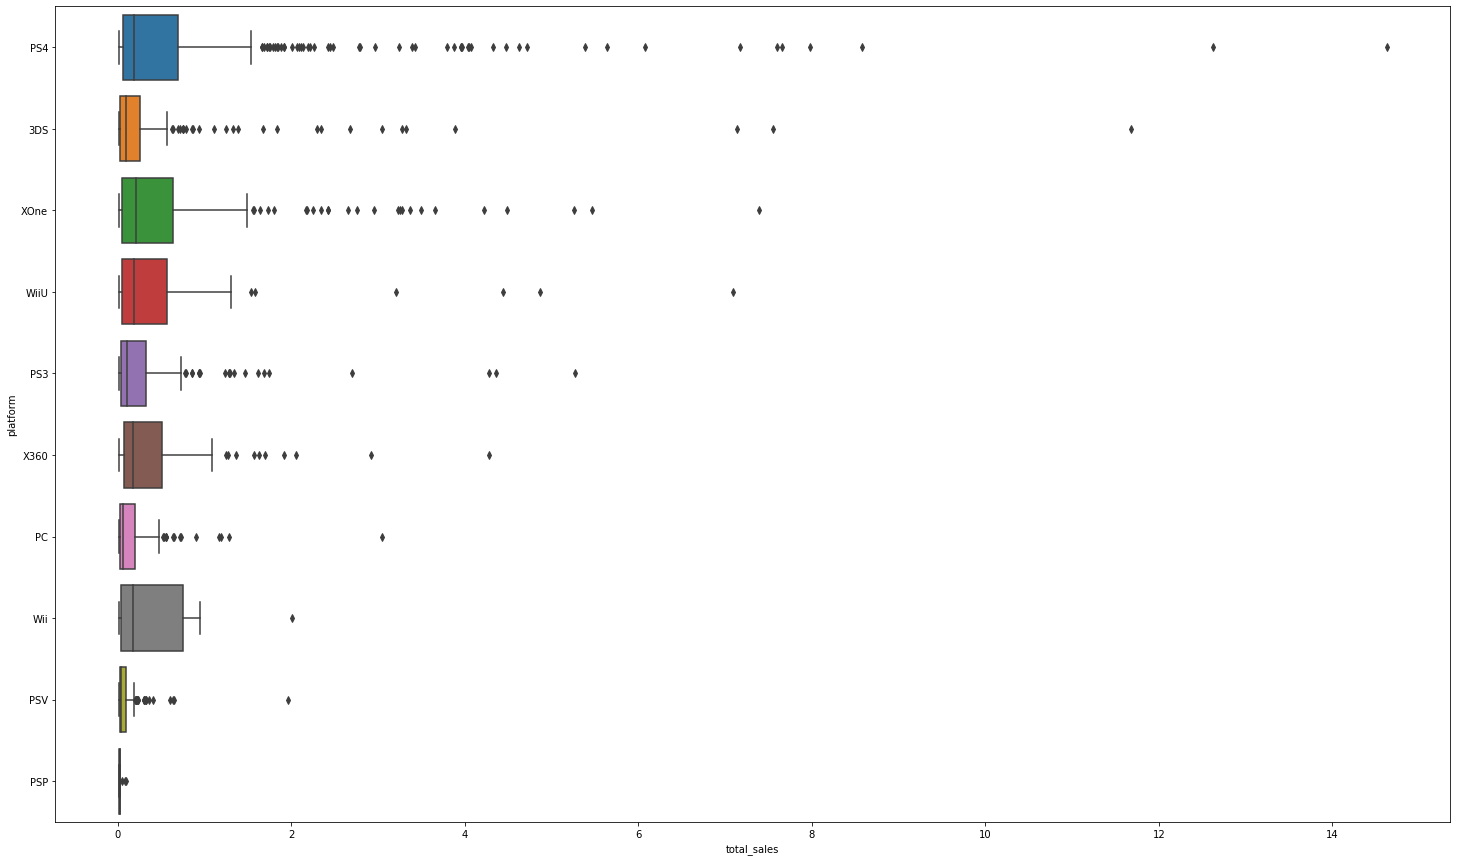

In [82]:
plt.figure(figsize=(25, 15))
sns.boxplot(y="platform", x="total_sales", data = games_actual, orient = "h")

Размахи очень и очень разнообразные. Почти все платформы скошены влево от медианы. На самой кассовой платформе - PS4, очень много выбросов в сторону увеличеня.

Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируйте выводы.

In [83]:
PS4 = games_actual.query('platform == "PS4"')

In [84]:
PS4['user_score'] = pd.to_numeric(PS4['user_score'], errors = 'coerce')
#PS4.info()

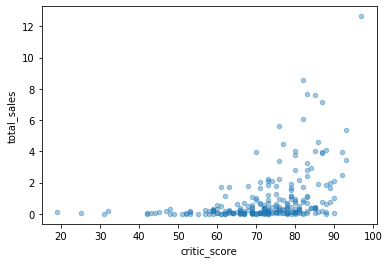

In [85]:
PS4.plot(x='critic_score', y='total_sales', kind = 'scatter', alpha=.4)

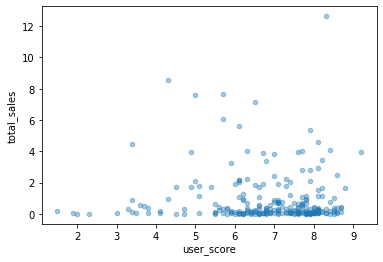

In [86]:
PS4.plot(x='user_score', y='total_sales', kind = 'scatter', alpha=.4)

На графиках рассеивания видно очевидную взаимосвязь между рейтингами критиков и покупалетей с общей продажей игр на платформе PS4. При этом на наиболее четко взаимосвязь очевидна на первом графике, на котором отражены рейтинги критиков и общие продажи.

Построим диаграмму корреляции.

In [87]:
PS4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,E,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,E,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,T,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,T,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


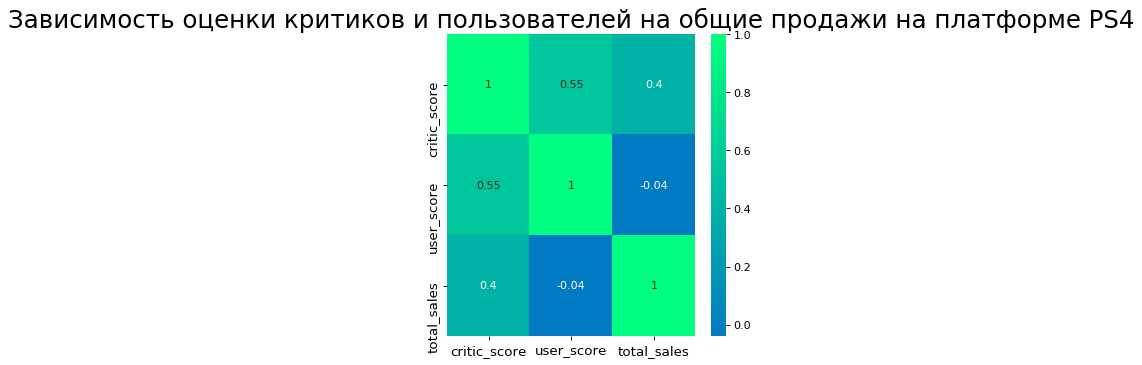

In [88]:
PS4_corr = PS4 [['critic_score','user_score', 'total_sales']]

plt.figure(figsize=(5,5), dpi= 80)
sns.heatmap(PS4_corr.corr(), xticklabels=PS4_corr.corr().columns, yticklabels=PS4_corr.corr().columns, cmap='winter', center=0, annot=True)

plt.title('Зависимость оценки критиков и пользователей на общие продажи на платформе PS4', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Можно заметить довольно сильную корреляцию на платформе PS4 оценки критиков с общими продажами - 0.4. При этом зависимость между общими продажами и оценками пользователей отсутсвует.

Составим такой же график корреляции для всех платформ.

In [89]:
#games_actual.info()

In [90]:
games_actual['user_score'] = pd.to_numeric(games_actual['user_score'], errors = 'coerce')
games_corr = games_actual [['critic_score','user_score', 'total_sales']]

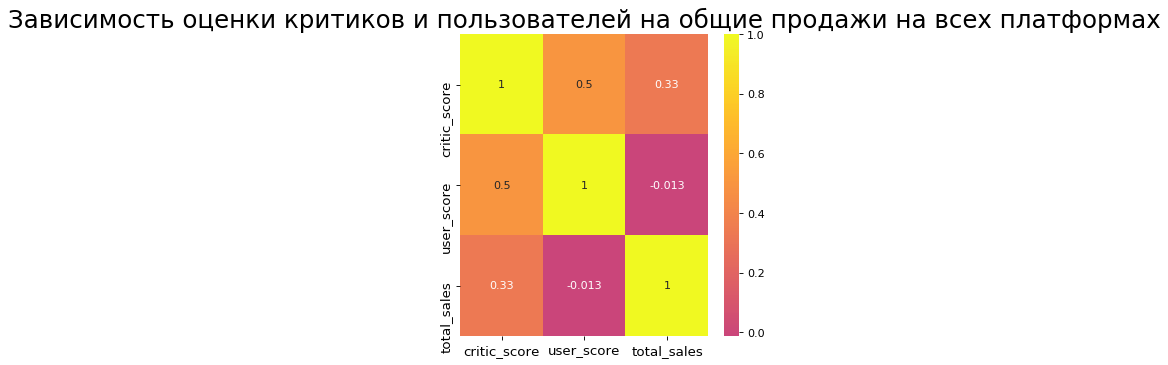

In [91]:
plt.figure(figsize=(5,5), dpi= 80)
sns.heatmap(games_corr.corr(), xticklabels=games_corr.corr().columns, yticklabels=games_corr.corr().columns, cmap='plasma', center=0, annot=True)

plt.title('Зависимость оценки критиков и пользователей на общие продажи на всех платформах', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

На всех платформах зависимость между общими продажами и оценкой критиков меньше.

Посмотрим на распределение игр по жанрам - какие самые прибылные?

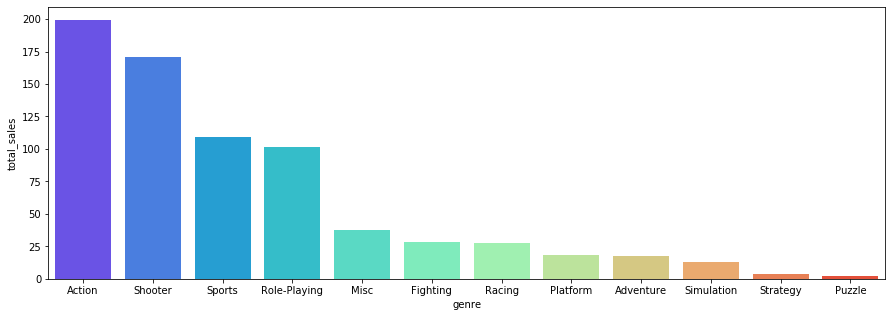

In [92]:
genre_count = games_actual.pivot_table(index=['genre'], values = ['total_sales'], aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(data = genre_count, x='genre', y='total_sales', palette='rainbow')

Как можно увидеть, самыми прибыльными являются игры жанра "action", "sports", и "shooter", при этом виден значительный отрыв лидера продаж от общего объема продвж спортивных игр, которые занимают второе место. Самые маленькие продажи у жанров "puzzle" и страгегий.

<a id='портрет'></a>
# Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):

-Самые популярные платформы (топ-5). Опишите различия в долях продаж.
-Самые популярные жанры (топ-5). Поясним разницу.
-Влияет ли рейтинг ESRB на продажи в отдельном регионе?

1. NA - Северная Америка

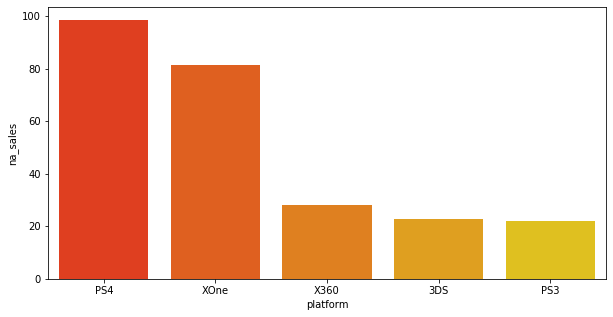

In [93]:
na_platform = games_actual.groupby(['platform'])['na_sales'].sum().nlargest(5).reset_index().sort_values(by='na_sales', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data = na_platform, x='platform', y='na_sales', palette='autumn')

In [94]:
print (na_platform)
print (na_platform['na_sales'].sum())

  platform  na_sales
0      PS4     98.61
1     XOne     81.27
2     X360     28.30
3      3DS     22.64
4      PS3     22.05
252.87000000000023


График выше показывает самые популярные платформы в Северной Америке - PS4, XOne, X360, 3DS и PS3. На самую популярную платформу PS4 приходиться около 39% всех продаж в Северной Америке, на втором месте - XOne, около 32% от общего объема продаж.

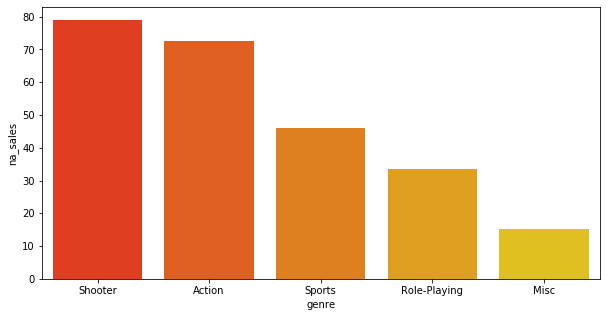

In [95]:
na_genre = games_actual.groupby(['genre'])['na_sales'].sum().nlargest(5).reset_index().sort_values(by='na_sales', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data = na_genre, x='genre', y='na_sales', palette='autumn')

Что касается популярности жанров, то тут первое место занимают шутеры, а не экшены как в мировом рейтинге. Тертье место - спортивные игры.

2. EU - Европа

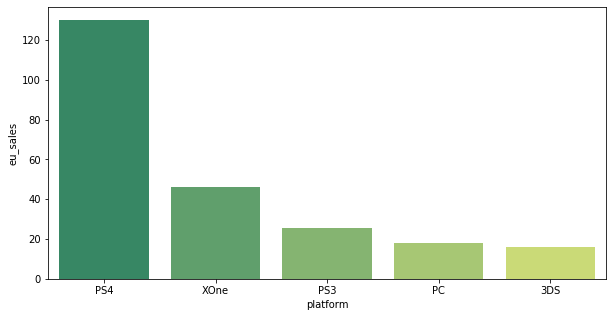

In [96]:
eu_platform = games_actual.groupby(['platform'])['eu_sales'].sum().nlargest(5).reset_index().sort_values(by='eu_sales', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data = eu_platform, x='platform', y='eu_sales', palette='summer')

In [97]:
print (eu_platform)
print (eu_platform['eu_sales'].sum())

  platform  eu_sales
0      PS4    130.04
1     XOne     46.25
2      PS3     25.54
3       PC     17.97
4      3DS     16.12
235.9200000000002


В Европе распределение платформ немного другое. На первом месте - PS4 занимает больше половины рынка c 55% продаж, на втором месте - XOne, 20%. Далее идут PS3, PS и 3 DS - 10, 7 и 6 % соответсвенно.

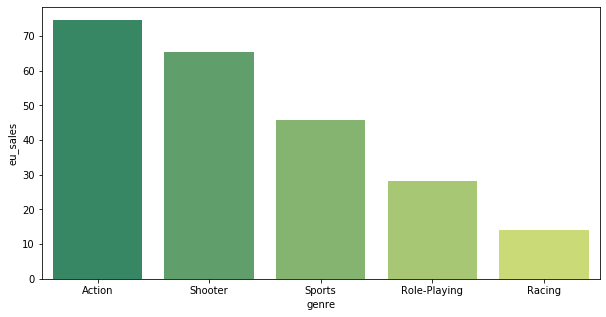

In [98]:
eu_genre = games_actual.groupby(['genre'])['eu_sales'].sum().nlargest(5).reset_index().sort_values(by='eu_sales', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data = eu_genre, x='genre', y='eu_sales', palette='summer')

По жанрам все то же самое, что и в общей таблице кроме последнего места в топе-5. В общем рейтинге и в Северной Европе это "Role-Playng", а в Европе - гонки.

3. JP - Япония

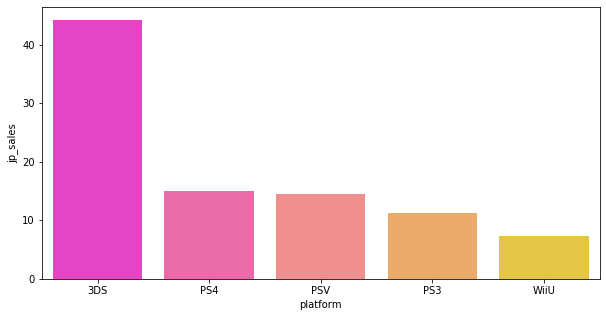

In [99]:
jp_platform = games_actual.groupby(['platform'])['jp_sales'].sum().nlargest(5).reset_index().sort_values(by='jp_sales', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data = jp_platform, x='platform', y='jp_sales', palette='spring')

In [100]:
print (jp_platform)
print (jp_platform['jp_sales'].sum())

  platform  jp_sales
0      3DS     44.24
1      PS4     15.02
2      PSV     14.54
3      PS3     11.22
4     WiiU      7.31
92.3299999999999


Данные по популярности платформ значительно отличаются от приведенных в Европе и Северной Америке. В Японии самая популярная платформа - 3DS (47%), зачем со значитеьным отрывом идет PS4 (20%), и только потом PS3(16%), PSV(15) и PS3 (8).

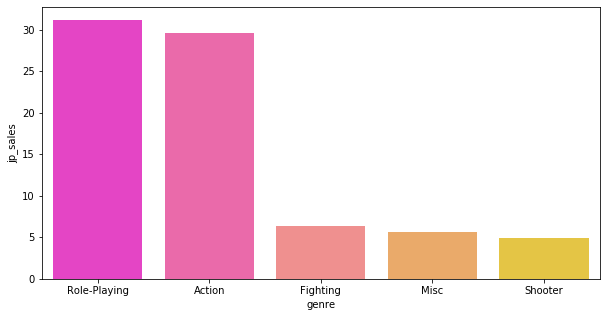

In [101]:
jp_genre = games_actual.groupby(['genre'])['jp_sales'].sum().nlargest(5).reset_index().sort_values(by='jp_sales', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data = jp_genre, x='genre', y='jp_sales', palette='spring')

Самые популярные игры в Японии - 'role-playing', далее с небольшим отрывом идет экшн, потом с большим отрывом другие жанры - драки, музыкальный жанр и шутеры.

Теперь определим, влияет ли рейтинг ESRB на продажи в отдельном регионе? Для этого построим таблицу корреляции продаж в регионах и рейтинга

In [102]:
games_actual['rating'].value_counts()

T       725
E       514
M       265
E10+    185
Name: rating, dtype: int64

In [103]:
#games_actual

Возрастные рейтинги согласно сайту http://www.gamer.ru/ деляться следующим образом:

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. 

«T» («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет.

«M» («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. 

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Игры, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.

«RP» ( «Rating Pending»») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых.

Сначала посмотрим распределение жанров и их влияние на сборы в Северной Америке.

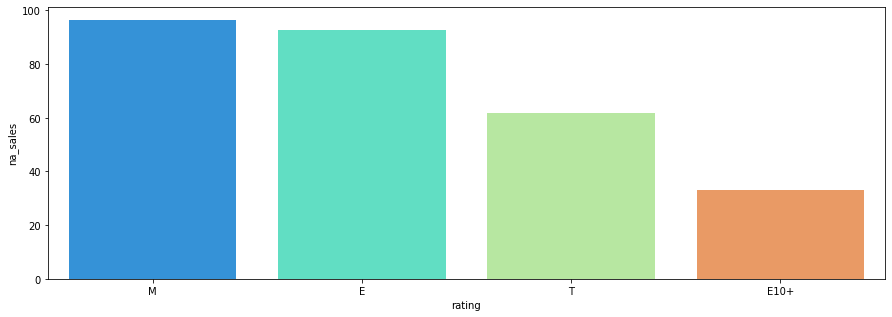

In [104]:
rates_na = games_actual.pivot_table(index=['rating'], values = ['na_sales'], aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(data = rates_na, x='rating', y='na_sales', palette='rainbow')

В Северной Америке наибольшие продажи выявлены в играх с рейтингом "от 17 лет", после чего идет рейтинг "для всех", затем - подросткам.

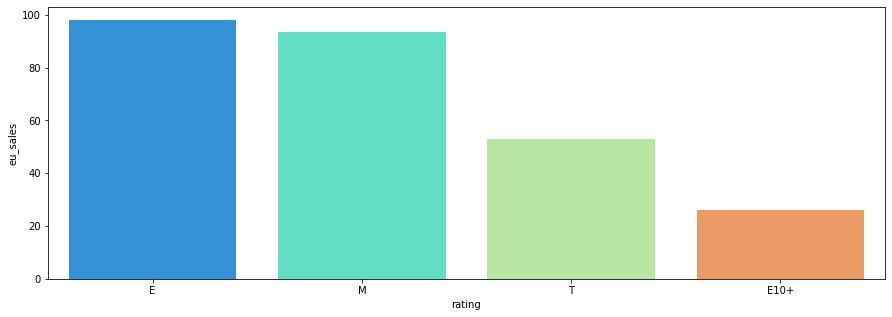

In [105]:
rates_eu = games_actual.pivot_table(index=['rating'], values = ['eu_sales'], aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(data = rates_eu, x='rating', y='eu_sales', palette='rainbow')

В Европе на первом месте игры "для всех", на втором - старше 17 лет, на третьем - для подростков. Посмотрим как обстоят дела в Японии. 

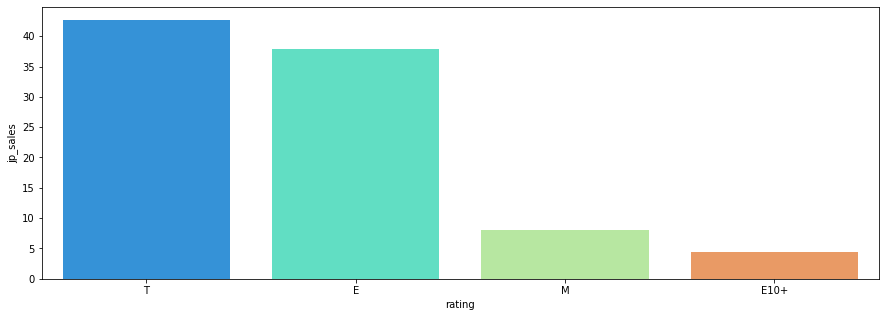

In [106]:
rates_jp = games_actual.pivot_table(index=['rating'], values = ['jp_sales'], aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(data = rates_jp, x='rating', y='jp_sales', palette='rainbow')

В Японии на первом месте также  игры для подростков, на втором - для подростков для всех, на третьем - для взрослых. При этом рейтинги игр для взрослых очень сильно отличаются и разрыв не такой, как на мировой статистике и статистике других регионов.

Согласно порталу gamer.ru hейтинги ESRB дейтвительны в США и Канаде, и большинство игровых издателей с уважением относятся к этой организации. Помимо ESRB, существуют и другие рейтинговые системы оценки игр: PEGI в Европе, CERO в Японии, а так же в Австралии

В Японии классификация идет от A до Z, соответствующая буква помещается на обложку. Продажа игр категории Z контролируются государством. 

<a id='гипотезы'></a>
# Шаг 5. Проверка гипотезы

HO - Средние пользовательские рейтинги платформ Xbox One не отличается от PC.

H1 - Средние пользовательские рейтинги платформ Xbox One отличается от PC.

Поскольку в данном случае мы анализируем различия между двумя группами данных, а именно сравниваем статистические совокупности - совокупность рейтингов платформы Xbox One с совокупностью рейтингов платформы PC. Рейтинг - количественный тип данных, данные независимые и 2 группы, соотвественно согласно типу исследуемых данных можно использовать t-критерий Стьюдента.

Посчитаем дисперсию

In [107]:
data_xbox = games_actual.query('platform == "XOne" and user_score.isna() == False')
data_pc = games_actual.query('platform == "PC" and user_score.isna() == False')

In [109]:
import numpy as np

In [110]:
variance_xbox = np.var(data_xbox['user_score'], ddof=1)
variance_pc = np.var(data_pc['user_score'], ddof=1)
print(variance_xbox)
print(variance_pc)

1.8910066518847013
2.901154315133451


Поскольку дисперсии значительно отличаются, equal_var = False

In [111]:
from scipy import stats as st
import numpy as np

In [112]:
first_result = st.ttest_ind(data_xbox['user_score'], data_pc['user_score'], equal_var = False)

alpha = .02 # взяла 2 %

print('p-значение:', first_result.pvalue)

if (first_result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Полученное значение говорит о том, что нулевую гипотезу отвергнуть не можем.

HO - Cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются.

H1 - Cредние пользовательские рейтинги жанров Action и Sports не отличаются.

In [113]:
data_action = games_actual.query('genre == "Action" and user_score.isna() == False')
data_sport = games_actual.query('genre == "Sports" and user_score.isna() == False')

In [114]:
variance_act = np.var(data_xbox['user_score'], ddof=1)
variance_sp = np.var(data_pc['user_score'], ddof=1)
print(variance_act)
print(variance_sp)

1.8910066518847013
2.901154315133451


In [115]:
second_result = st.ttest_ind(data_action['user_score'], data_sport['user_score'],  equal_var = False)

alpha = .05 # взяла 5 %

print('p-значение:', second_result.pvalue)

if (second_result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Полученное значение говорит о том, что нулевую гипотезу принять не можем.

<a id='вывод'></a>
# Рекомендации и выводы

Для того, чтобы выбрать потенциально прибыльный продукт и спланировать рекламную кампанию, для начала нужно понять на какие именно районы мира нацелены основные продажи данной игры. Поскольку нам необходим максимальный охват, то за основу берем мировые характеристики. Выбираем 3 наиболее прибыльных жанра игры - экшн, шутер, спорт. Игру должны поддерживать наиболее популярные у пользователей платформы - PS4, XOne и 3DS.

Также необходимо учесть 3 самых прибыльных возрастных рейтинга по системе ESRB: T, E, и M. Однако дополнительно необходимо провести анализ других ассоциаций, присваивающих вострастной рейтинг и составить наиболее популярные рйтинги согласно другим ассоциациями, с аналогами в ESRB. 

Так, в Японии самым популярным жанром и платформой являются role-playing и 3DS, однако информации о возрастных рейтингах этих игр не хватает из-за другой системы оценки - CERO.

Далее при выботе потенциальной игры нужно обязатеьно учесть рейтинги критиков, которые имеют определенное влияние сред пользователей и имеют возможность испытать игру до ее официального релиза.